# EBA 3500 Home Exam 

## Task 1 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
modechoice = sm.datasets.modechoice.load_pandas().data


### (a)(ii) Using the data

In [2]:
choice_new = {1.0: 'Yes', 0.0: ' No'}
modechoice['choice'] = modechoice['choice'].map(choice_new).astype('category')

mode_new = {1.0 : 'Air', 2.0 : 'Train', 3.0 : 'Bus', 4.0 : 'Car'}
modechoice['mode'] = modechoice['mode'].map(mode_new).astype('category')

# We adjusted the dataframe according to the documentation page for modechoice

In [3]:
modechoice.head()

,individual,mode,choice,ttme,invc,invt,gc,hinc,psize
0,1.0,Air,No,69.0,59.0,100.0,70.0,35.0,1.0
1,1.0,Train,No,34.0,31.0,372.0,71.0,35.0,1.0
2,1.0,Bus,No,35.0,25.0,417.0,70.0,35.0,1.0
3,1.0,Car,Yes,0.0,10.0,180.0,30.0,35.0,1.0
4,2.0,Air,No,64.0,58.0,68.0,68.0,30.0,2.0


### (b) Taking a look at the data

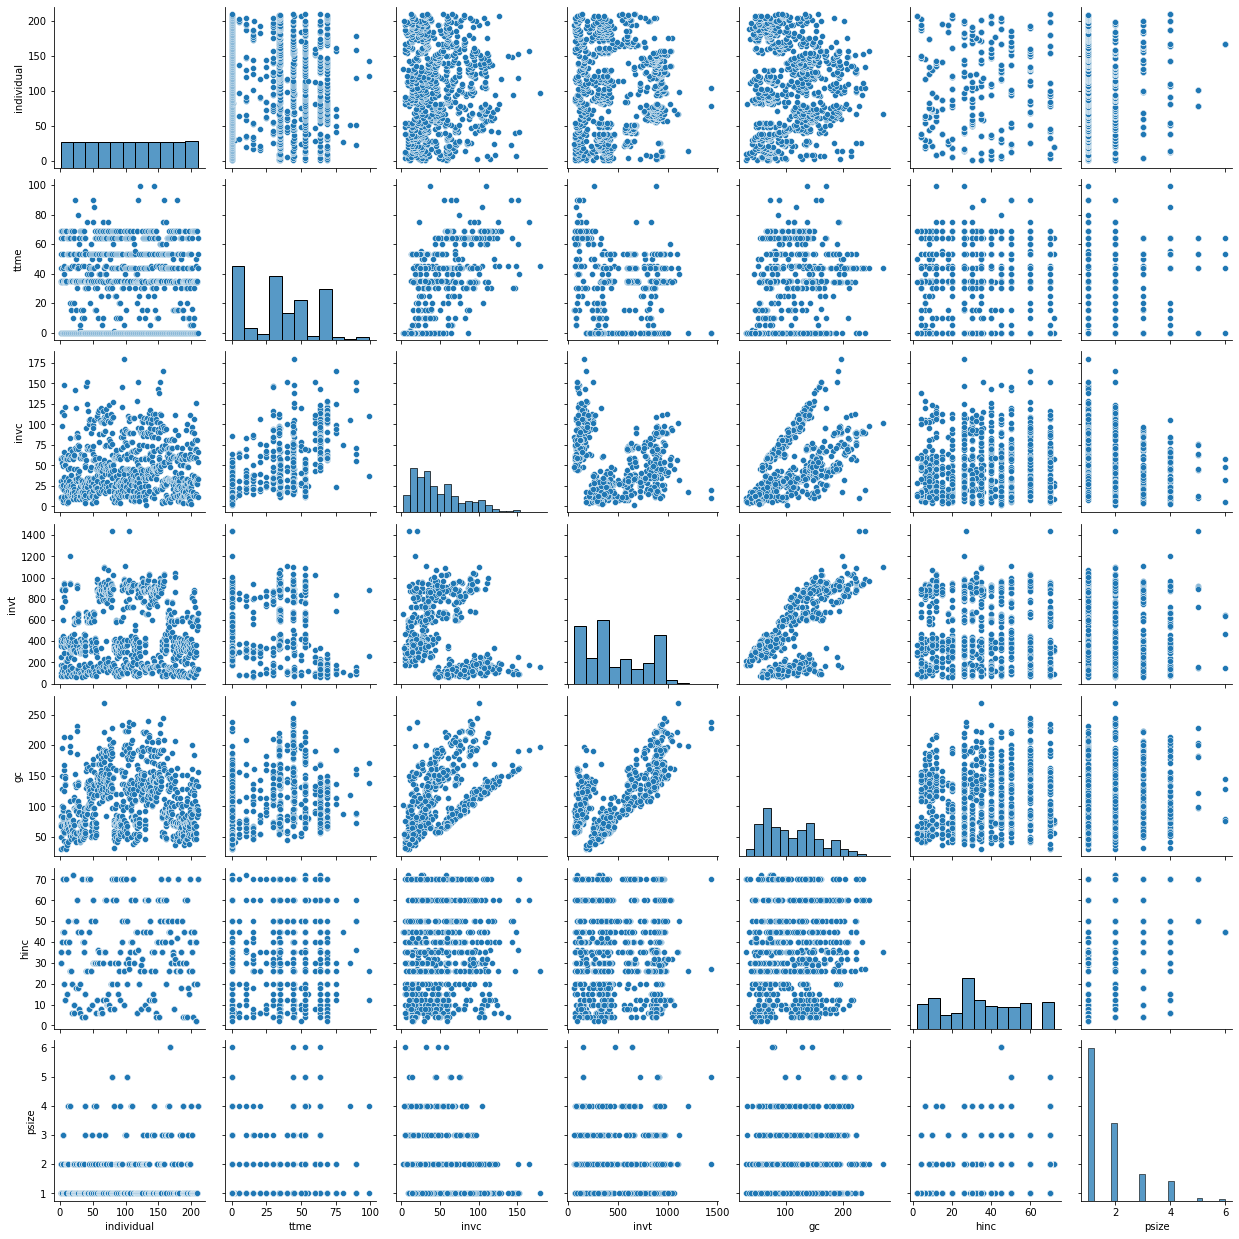

In [4]:
import seaborn as sns
sns.pairplot(data= modechoice)
plt.show()

In [5]:
modechoice.corr()

,individual,ttme,invc,invt,gc,hinc,psize
individual,1.000000,-0.024319,0.010302,0.012244,0.016439,0.051693,0.046910
ttme,-0.024319,1.000000,0.580386,-0.332132,0.157946,0.013371,0.101439
invc,0.010302,0.580386,1.000000,-0.160005,0.524506,0.075137,-0.124513
invt,0.012244,-0.332132,-0.160005,1.000000,0.717310,0.018190,0.025366
gc,0.016439,0.157946,0.524506,0.717310,1.000000,0.098992,0.101475
hinc,0.051693,0.013371,0.075137,0.018190,0.098992,1.000000,0.180963
psize,0.046910,0.101439,-0.124513,0.025366,0.101475,0.180963,1.000000


### (c) Evaluating models 

In [6]:
res1 = smf.ols('ttme ~ invc*gc' ,data = modechoice).fit()
print(res1.rsquared_adj)
sm.stats.anova_lm(res1, typ=1)

0.4269949869709381


,df,sum_sq,mean_sq,F,PR(>F)
invc,1.0,175909.158049,175909.158049,493.216282,2.980941e-86
gc,1.0,15455.370225,15455.370225,43.333959,8.143404e-11
invc:gc,1.0,32691.322162,32691.322162,91.660335,1.128063e-20
Residual,836.0,298165.453135,356.657241,NaN,NaN


The anova table for this regression model (res1) shows extremely low p value for the interaction invc:gc so we keep it.

In [7]:
res2 = smf.ols('ttme ~ invc * gc + invt' , data = modechoice).fit()
print(res2.rsquared_adj)
sm.stats.anova_lm(res2, typ=1)

0.4868208694299331


,df,sum_sq,mean_sq,F,PR(>F)
invc,1.0,175909.158049,175909.158049,550.714916,6.249004e-94
gc,1.0,15455.370225,15455.370225,48.385786,7.070609e-12
invc:gc,1.0,32691.322162,32691.322162,102.346000,8.987291e-23
invt,1.0,31450.057147,31450.057147,98.459999,5.178858e-22
Residual,835.0,266715.395988,319.419636,NaN,NaN


Model res2 shows low p value for invt and improves adjusted $R^2$ so we keep it in the model.

In [8]:
res3 = smf.ols('ttme ~ invc * gc + invt + invc*psize', data = modechoice).fit()
print(res3.rsquared_adj)
sm.stats.anova_lm(res3, typ=1)

0.49232307130539266


,df,sum_sq,mean_sq,F,PR(>F)
invc,1.0,175909.158049,175909.158049,556.683564,1.157519e-94
gc,1.0,15455.370225,15455.370225,48.910191,5.501093e-12
invc:gc,1.0,32691.322162,32691.322162,103.455226,5.496207e-23
invt,1.0,31450.057147,31450.057147,99.527109,3.219145e-22
psize,1.0,1417.420285,1417.420285,4.485580,3.447758e-02
invc:psize,1.0,2074.237510,2074.237510,6.564149,1.058020e-02
Residual,833.0,263223.738193,315.994884,NaN,NaN


Model res3 slightly improves adjusted $R^2$. However, it shows large p value for interaction between invc and psize which suggests we should not keep psize in this model.

In [9]:
res4  = smf.ols('ttme ~ invc*gc + invt + invc*hinc', data=modechoice).fit()
print(res4.rsquared_adj)
sm.stats.anova_lm(res4, typ=1)


0.4874637236460313


,df,sum_sq,mean_sq,F,PR(>F)
invc,1.0,175909.158049,175909.158049,551.405656,5.663079e-94
gc,1.0,15455.370225,15455.370225,48.446475,6.877989e-12
invc:gc,1.0,32691.322162,32691.322162,102.474369,8.539361e-23
invt,1.0,31450.057147,31450.057147,98.583494,4.928067e-22
hinc,1.0,963.336661,963.336661,3.019680,8.262929e-02
invc:hinc,1.0,8.813975,8.813975,0.027628,8.680260e-01
Residual,833.0,265743.245352,319.019502,NaN,NaN


Similar to the previous regression model this model named res4 shows negligibly improved adjusted $R^2$ value. However, pvalue for interaction between invc and hinc is greater than 0.001 therefore we should not keep hinc in this model.

In [10]:
res5 = smf.ols('ttme ~ invc*gc + invt + choice', data=modechoice).fit()
print(res5.rsquared_adj)
sm.stats.anova_lm(res5,typ=1)


0.5460222549847842


,df,sum_sq,mean_sq,F,PR(>F)
choice,1.0,25696.114683,25696.114683,90.936927,1.576747e-20
invc,1.0,175051.885010,175051.885010,619.497567,1.059727e-102
gc,1.0,19618.523940,19618.523940,69.428717,3.242377e-16
invc:gc,1.0,31087.650572,31087.650572,110.017232,2.909037e-24
invt,1.0,35103.133266,35103.133266,124.227772,5.435060e-27
Residual,834.0,235663.996101,282.570739,NaN,NaN


Model res5 shows that adding the choice covariate not only significantly improves the adjusted $R^2$ but also keeps pvalies consistantly low thoughout the anova tests. This clearly indicatesa we should keep it in the model.

### (d) making predictions

In [11]:
results = smf.ols('ttme ~ mode + choice + invc + invt', data = modechoice).fit()

In [12]:
df3 = pd.DataFrame({"mode":['Air', 'Train', 'Car', 'Bus'],
                    "choice":[' No', ' No', 'Yes', ' No'],
                    "invc":[70, 30, 24, 35],
                    "invt":[90, 500, 0, 0]})


In [13]:
print(df3.dtypes);
df3['choice'] = df3['choice'].astype('category')

df3['mode'] = df3['mode'].astype('category')


mode      object
choice    object
invc       int64
invt       int64
dtype: object


In [14]:
results.predict(df3)

0    64.121729
1    38.854060
2   -10.739900
3    40.482585
dtype: float64

In [15]:
predicted = list(results.predict(df3))
del predicted[3]
predicted = tuple(predicted)
print(predicted)

(64.12172882741862, 38.85405989269803, -10.739899878464465)


(ii) making predictions

<AxesSubplot:xlabel='ttme', ylabel='predicted'>

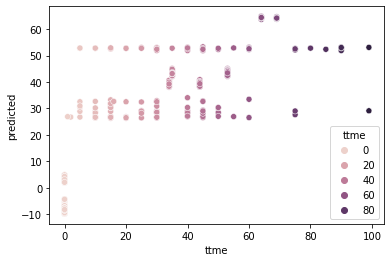

In [16]:
ttme_data = modechoice.drop(['individual', 'gc', 'hinc', 'psize'], axis=1)


predicted = results.predict(modechoice)
ttme_data['predicted'] = predicted

sns.scatterplot(x='ttme', y='predicted', data=ttme_data, hue='ttme')


2). If the plot were able to predict ttme perfectly it would yield a perfect y=x line across the plot

### (f) Missing covariates 
(i)

In [17]:
# make new vector for bob without mode covariate since he forgot

bobs_vector = pd.DataFrame({'choice':['No'],
                           'ttme' : [np.nan],    
                           'invc' : [70.0],
                           'invt': [90.0]})

# make new dataframe for bob since we have to drop all the covariates he forgot
data = modechoice.drop(['mode','individual', 'gc', 'hinc', 'psize'], axis=1)
bobs = pd.concat([bobs_vector,data])

In [19]:
# modify regression model for uncle bob without mode covariate and new dataframe
res = smf.ols('ttme ~ choice + invc + invt' ,data= bobs).fit()
# add new collumn for predicted ttme and insert predicted values
predict = res.predict(bobs)
bobs['Predicted'] = predict
bobs.head()


,choice,ttme,invc,invt,Predicted
0,No,NaN,70.0,90.0,56.263868
0,No,69.0,59.0,100.0,51.501197
1,No,34.0,31.0,372.0,33.813093
2,No,35.0,25.0,417.0,30.322666
3,Yes,0.0,10.0,180.0,15.245925


Here we can see bobs vector on the first row with a predicted ttme of 56.26!

(ii)

In [20]:
#repeat same procedure as above but remove covariates choice and invc but include mode
bobs_vector2 = pd.DataFrame({'mode':['Air'],
                           'ttme' : [np.nan],    
                           'invt': [90.0]})
                           

data2 = modechoice.drop(['choice','invc','individual', 'gc', 'hinc', 'psize'], axis=1)
bobs_2 = pd.concat([bobs_vector2,data2])

In [21]:
res_2 = smf.ols('ttme ~ mode + invt', data = bobs_2).fit()
predict2 = res_2.predict(bobs_2)
bobs_2['Predicted'] = predict2 
bobs_2.head()

,mode,ttme,invt,Predicted
0,Air,NaN,90.0,60.742497
0,Air,69.0,100.0,60.803588
1,Train,34.0,372.0,34.246980
2,Bus,35.0,417.0,40.359189
3,Car,0.0,180.0,-2.402133


Here we see bobs vector on the first row with a predicted ttme of 60.74. Even though we predicted ttme Perhaps its time for uncle bob to retire due to his faulty memory

# Task II: Algorithms for regression

### (a) Extract response and covariates from a formula

In [22]:

def extract(Formula):
    # Here we remove whitespace from the formula and seperate the response from the covariates
    ws_rem = Formula.replace(" ","")
    Formula_Split = ws_rem.split("~")
    response = Formula_Split[0]
    
    # We then seperate the covariates from the'+' operators  
    Covariates_List = Formula_Split[1]
    cvlReplaced = Covariates_List.replace("+",",")
    covariates = cvlReplaced.split(",")
    return ( response , covariates)


extract('x ~ y + z')

('x', ['y', 'z'])

### (b) Adding a covariate to a formula

In [23]:
def add_covariate(formula, covariate):
    # We simpy remove the whitespace and add a '+' sybol before the new covariate
    ws_rem = formula.replace(" ", "")
    return ws_rem + '+' + covariate



In [24]:
add_covariate('y ~ x + y ', 'u')

'y~x+y+u'

### (c) Find all extensions of a model by one covariate


In [25]:
def extend_model(formula, covariates):
    
    # remove whitespace
    ws_rem = formula.replace(" ","")
    
       
    # Comprehension list which removes dupliate covariates 
    fin = [i for i in covariates if i not in (extract(formula)[1])]
    
    # make new list with the formula plus the unique covariates
    cov = []
    for i in fin:
        cov.append(ws_rem + "+" + i)
    return cov
        
    
        

In [26]:
extend_model('y ~ x + u + z', ['z' ,'j','p', 'r', 'x'])

['y~x+u+z+j', 'y~x+u+z+p', 'y~x+u+z+r']

### (d) Choosing the best covariate to add)

In [27]:
def improve_model(formula, covariates, data):
    
    # Remove whitespace
    ws_rem = formula.replace(" ","")
   
    
    # Create library where covariate is the key and rsquared is the value
    cov = {}
    for i in covariates:
        cov[i]=((smf.ols(formula + "+" + i , data= data).fit()).rsquared)
    
    # Get the key with the max rsquared value
    a = (max(cov, key = cov.get))
    
    # Return the original formula plus the covariate with highest rsquared value
    return ws_rem + "+" + a 
    
    
improve_model('ttme ~ mode + choice',['invc','gc','hinc','psize'], modechoice)

'ttme~mode+choice+psize'

### (e) Select the $k<p$ most significant predictors (i)

In [28]:
def forward_k(formula, covariates, k ,data):
    
    # remove whitespace 
    ws_rem = formula.replace(" ","")
    
    # make library with r squared values
    cov = {}
    for i in covariates:
        cov[i]=((smf.ols(formula + "+" + i , data= data).fit()).rsquared)
        
    #convert to sorted list of tuples with lambda function    
    a = sorted(cov.items(),key=lambda x: x[1], reverse = True)
    
    # list for k amount of covariates
    lst = []
    for i in range(k):
        lst.append(a[i][0])
    
    # cheap solution to get corect format in question 2h
    
    formula1 = ws_rem + "+" + "+".join(lst)
    formula2 = 'ttme~' + '+'.join(lst)
    
    
    if formula =='ttme~':
        return(formula2)
    else:
        return(formula1)

    
    
              
            
forward_k('ttme ~ mode + choice', ['invc','gc','hinc','psize'], 2, modechoice)
              
              

'ttme~mode+choice+psize+gc'

In [29]:
formula = "ttme ~ mode + choice + invc"
form = 'ttme~'
covariates = ["hinc", "psize", "invt", "gc"]


forward_k(form, covariates, 3, modechoice)

'ttme~invt+gc+psize'

In [30]:
forward_k(forward_k(formula, covariates, 1, modechoice), covariates, 1, modechoice)

'ttme~mode+choice+invc+psize+gc'

### (f) Select the $k<p$ most significant predictors (ii)

In [31]:
def forward_k2_bloated(formula, max_formula, k ,data):
    
    # call extract funtion so split up formulas 
    ws_rem = formula.replace(" ","")
    b = extract(formula)[1]
    c = extract(max_formula)[1]
    
    
    # create comprehension list for unique values 
    fin = [i for i in c if i not in b]

    # create dictionary for r2 values 
    cov = {}
    for i in fin:
        cov[i]=((smf.ols(formula + "+" + i , data= data).fit()).rsquared)
        
    # convert dictionary to list of tuples so we can index and order   
    a = sorted(cov.items(),key=lambda x: x[1], reverse = True)

    #create new list of most significant predictors based on k
    lst = []
    for i in range(k):
        lst.append(a[i][0])
    
    # create variable with appropriate content
    formula1 = ws_rem + "+" + "+".join(lst)
    
    # return variable
    return formula1
    
    
              
        
        

In [32]:
formula = "ttme ~ mode + choice + invc"
max_formula = "ttme ~ mode + choice + invc + hinc + psize + invt + gc"
forward_k2_bloated(formula, max_formula, 3, modechoice)

'ttme~mode+choice+invc+psize+gc+invt'

(ii)

In [33]:
def forward_k2(formula, max_formula, k ,data):
    
    # Get the list of covariates from the max formula using out extract function
    cov = extract(max_formula)[1]
    
    # Return forward k function with our new covariates
    return forward_k(formula, (cov), k, data)


# much cleaner version of forward_k2 but bloated version shows understanding 

In [34]:
formula = "ttme ~ mode + choice + invc"
max_formula = "ttme ~ mode + choice + invc + hinc + psize + invt + gc"
forward_k2(formula, max_formula, 3, modechoice)

'ttme~mode+choice+invc+psize+gc+invt'

### (g) Select covariates as long as the increment in  𝑅2  is larger than  𝛿 .

In [35]:
def forward_delta(formula, covariates, delta ,data):
    
    
    
    # insert r squared values in a dictionary with covariate as key
    cov = {}
    for i in covariates:
        cov[i]=((smf.ols(formula + "+" + i , data= data).fit()).rsquared)
        
    # create delta value    
    #delta = 0.00 
    
    # create library 
    dlt = {} 
    old_rsq = 0
    
    # create for loop for new rsquared value and insert into library
    for i in covariates:
        new_rsq = cov[i] - old_rsq
        old_rsq = cov[i]
        if new_rsq > delta:
            dlt[i] =(new_rsq)

    
    # convert libary into sorted list of tuples so we can index
    a = sorted(dlt.items(),key=lambda x: x[1], reverse = True)
    
    #create new list with k amount of accepted covariates 
    k = len(a)
    d=[]
    for i in range (k):
        d.append(a[i][0])
    
    
    #return forward k functions with new list of covariates
        
    return forward_k(formula,d,k,data)
    

   
    
    
    
    
              
            


### (h) Application 

In [36]:
covariates_h = ["individual", "mode", "choice", "invc", "hinc", "psize", "invt", "gc", "choice * psize", "mode * choice"]
delta = 0.01
forward_delta('ttme~', covariates_h, delta, modechoice)

'ttme~mode * choice+mode+invc+invt+choice * psize+psize'

### (h) Comments 

Here we can see that our function allowed for every covariate and interaction besides gc and hinc as they both yield and increase in $R^2$ greater than 0.01. Therefor, the model we see above yields the highest possible $R^2$ which makes it the "best" of the modechoice dataframe 

In [37]:
best = smf.ols('ttme~mode * choice+mode+invc+invt+choice * psize+psize',data = modechoice).fit()


# Task III : Simulations

### (a) Find the t-test in statsmodels and apply it.

In [38]:
nile = sm.datasets.nile.load_pandas().data


In [39]:
from scipy import stats
result = stats.ttest_1samp(a=nile['volume'] , popmean = 1000 , axis=0 , nan_policy = 'propagate')
result.pvalue
#alpha = 0.05 > p-value = 0.000006461, thus reject null hypothesis and accept alternative hypothesis.


6.46114014799341e-06

### (b) Roll your own t-test function

In [40]:
def ttest(x,popmean):
    
    #calculate mean and standard error using numpy
    mean = np.mean(x)
    stderr = np.std(x , ddof=1) / np.sqrt(len(x))
    
    #calculate t-statistics
    t = abs(mean - popmean) / stderr
    
    #n is length of data
    n = len(x)
    
    # two-tailed critical value at alpha = 0.05
    # q is lower tail probability and df is the degrees of freedom
    t_crit = stats.t.ppf(q = 0.975 , df = n-1)
    
    #two-tailed p value
    p = 2*(1-stats.t.cdf(x = t , df = n-1))
    return (p )
    

ttest(nile['volume'],1000)


6.4611401480174635e-06

### (c) The non-central t-distribution

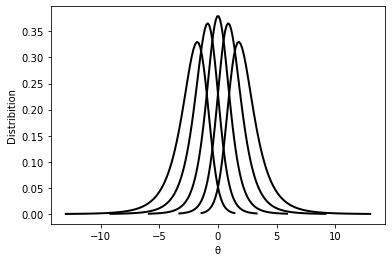

In [41]:
#'nct' is an object which inherits generic methods from instance'rv_continuous' class and completes 
# them with specific detail for non central t-distribution
from scipy.stats import nct
import numpy as np 
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

#df are degrees of freedom and nc are non centrality parameters 
df = 5
nc= [-2,-1,0,1,2] 

# loop through thetas and making a graph of each
for i in nc:
    
    #'np.linspace()'creates an evenly spaced numeric sequence & 'nct.ppf' is percent point function i.e inverse of cdf.
    x = np.linspace(nct.ppf(0.001, df, i),
                nct.ppf(0.999, df, i), 100)
    
    #fix the given parameters and display the probability density function
    
    rv = nct(df, i)
    ax.plot(x, rv.pdf(x), 'k-', lw=2)
    
    plt.xlabel('θ')
    plt.ylabel('Distribition')



### (d) Power of the test (i)

In [42]:
import math
import statsmodels
from scipy.stats import norm
from statsmodels.stats.power import TTestIndPower
def power(mu,sigma,n,alpha=0.05):
    #mean is mu, sigma is std dev, n is number of data
    
    #calculate T
    stderr = sigma/np.sqrt(n)
    t = mu / (stderr)
    
    #degrees of freedom
    df = n-1
    
    # upper tail probability for ppf-quantiles
    q=1-(alpha/2)
    
        
    # effect size measures strength of relationship between two variables
    
    effect_size = math.sqrt(n)*mu/sigma 
    
    
    # find quantiles with ppf function for cdf

    quantiles = stats.nct.ppf(q,df,0)

    
    
    # calcutlate CDF 
    cdf =stats.nct.cdf(quantiles,df,effect_size)
    
    # calculate the right side of the equation
    cdf2=stats.nct.cdf(-quantiles,df,effect_size)
    
    
    
    powerr = (1- cdf + cdf2)
         
    
    return powerr

        
        
        
    

power(1,1,10)

0.8030968422221972

In [43]:
power(0,1,10)

0.049999999999978895

In [44]:
power(0.1,2,22)

0.0557673019921122

Given a mean of 0.1 a standard deviation of 2 and a sample size of 22, we have a 5.5 percent chance of rejecting the null-hypothesis.

### (e) Power of the test (ii)

Due to limits in our combined intellegence and in additon to time constraints, we were unable to complete tasks e and f 